In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense

In [ ]:
df = pd.read_csv('/content/iris_dataset.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#DATA PREPARATION 
print(df.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [ ]:
X = df.drop('target', axis=1)
y = df['target']
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: target, Length: 150, dtype: object


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [ ]:
print("length of training dataset: ", len(X_train))
print("length of validation dataset: ", len(X_test))

length of training dataset:  135
length of validation dataset:  15


In [ ]:
features_encoder = StandardScaler()
features_encoder.fit(X_train)
X_train = features_encoder.transform(X_train)
X_test = features_encoder.transform(X_test)

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
########################################################
y_train = label_encoder.transform(y_train).reshape(-1, 1)
y_test = label_encoder.transform(y_test).reshape(-1, 1)
print(X_train)

[[ 0.56195149  0.56791065  0.51776964  0.51036026]
 [ 0.80278784 -0.12487192  1.14441016  1.30078436]
 [-0.28097574 -1.27950953  0.06203108 -0.1483265 ]
 [-0.16055757 -0.58672696  0.403835    0.1151482 ]
 [ 0.68236966 -0.58672696  1.03047552  1.30078436]
 [-1.36473933  0.33698312 -1.24821727 -1.33396266]
 [ 0.32111514 -0.12487192  0.63170428  0.77383496]
 [-1.0034848   0.79883817 -1.24821727 -1.07048796]
 [ 0.68236966 -0.58672696  1.03047552  1.16904701]
 [ 2.4886423   1.72254825  1.48621408  1.03730966]
 [ 1.04362419 -0.12487192  0.80260624  1.43252172]
 [ 1.04362419 -1.27950953  1.14441016  0.77383496]
 [ 1.16404237  0.33698312  1.20137748  1.43252172]
 [-1.24432115 -0.12487192 -1.36215191 -1.20222531]
 [-1.24432115  0.1060556  -1.24821727 -1.33396266]
 [-1.4851575   1.26069321 -1.59002119 -1.33396266]
 [-0.16055757  3.10811338 -1.30518459 -1.07048796]
 [ 1.04362419  0.1060556   0.34686768  0.24688555]
 [-1.24432115  0.79883817 -1.24821727 -1.33396266]
 [-1.72599385  0.33698312 -1.41

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135, 1)
(15, 1)


In [ ]:
model=Sequential()
model.add(Dense(8,activation="relu", input_shape=(4,)))
model.add(Dense(16,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(3,activation="softmax"))


In [ ]:
model.layers

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,epochs=200, verbose=0,validation_data=(X_test, y_test))

In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 8)                 40        
                                                                 
 dense_78 (Dense)            (None, 16)                144       
                                                                 
 dense_79 (Dense)            (None, 32)                544       
                                                                 
 dense_80 (Dense)            (None, 3)                 99        
                                                                 
Total params: 827
Trainable params: 827
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 29ms/step - loss: 0.0503 - accuracy: 1.0000


[0.05032351240515709, 1.0]

In [ ]:
model.evaluate(X_train,y_train)

5/5 [==============================] - 0s 4ms/step - loss: 0.0456 - accuracy: 0.9778


[0.04556659981608391, 0.9777777791023254]

In [ ]:
predictions=model.predict(X_test)
predictions

1/1 [==============================] - 0s 62ms/step


array([[2.9311830e-04, 9.9774718e-01, 1.9597423e-03],
       [9.9741429e-01, 2.3874890e-03, 1.9816551e-04],
       [3.1345576e-10, 4.9068358e-06, 9.9999505e-01],
       [7.1575597e-04, 9.7015476e-01, 2.9129341e-02],
       [1.3779421e-04, 9.6912259e-01, 3.0739544e-02],
       [9.9914712e-01, 8.0991024e-04, 4.2925632e-05],
       [3.7181596e-03, 9.9578965e-01, 4.9212459e-04],
       [1.3797389e-06, 1.0568018e-03, 9.9894184e-01],
       [4.3020398e-05, 5.4186523e-01, 4.5809180e-01],
       [4.3286892e-04, 9.9883395e-01, 7.3320541e-04],
       [9.1362439e-05, 6.3932963e-02, 9.3597567e-01],
       [9.9947900e-01, 5.0174515e-04, 1.9330950e-05],
       [9.9905497e-01, 8.8543486e-04, 5.9591694e-05],
       [9.9933928e-01, 6.3811761e-04, 2.2616048e-05],
       [9.9998951e-01, 9.0020330e-06, 1.3719831e-06]], dtype=float32)

In [ ]:
print(history.history. keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


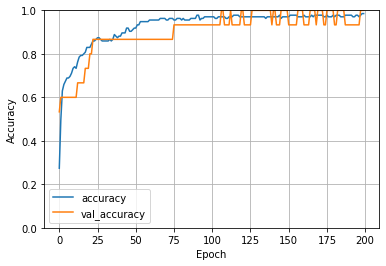

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


In [ ]:
model.save("trained_classifier_model.csv")

In [ ]:
loaded_model = models.load_model('trained_classifier_model.csv')


In [ ]:
results = loaded_model.predict(X_test)
preds = np.argmax(results, axis=1)

1/1 [==============================] - 0s 60ms/step


In [ ]:
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

